# EasyVisa Project

## Context:

Over 2,000 employers in the United States of America were surveyed and have reported challenges securing needed human resources. A 2018 survey by the ManpowerGroup found that 46% of US companies report having challenges filling or backfilling positions within their businesses.
Considering the competition for talents, this challenge is not strange.
Businesses with positions to fill, as part of the recruitment process, see the challenges manifest in searching, identifying and attracting suitable talents locally and abroad. This challenge has been even compounded in the aftermath of the COVID-19 virus. Many talents now have demands which were non-existent pre-COVID.

The Office of Foreign Labor Certification is saddled with the responsibility for labour certications, labour attestation applications, and processing prevailing wages by virtue of the Immigration and Nationality Act (INA). Through the OFLC, The US Department of Labour administers the various Foreign Labour Certification programs among which is ensuring US employers comply with statutory requirements, providing guidance for processing applications through published directives and advisories.

To this end, the OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available, able, willing and sufficiently skilled to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In Q1 of FY 2022 alone, the OFLC processed over 120,300 applications for different business looking to fill over 220,000 positions for temporary and permanent labour certifications while in Q2 of FY 2022 a total of 151,603 applications were processed for 305,548 positions. Amounting to a 26% increase in applications. It is, therefore, evident that an efficient and faster approach for reviewing applications is necessary.

EasyVisa recommends a faster and more efficient approach that is able to free up time for officials to focus on less repetitive or tedious tasks such a machine learning solution. Based on the data provided, a machine learning model will be built to identify and classify applications with higher chances of VISA approval.

The machine learning classification model will:

* Make visa approvals processing faster.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Mount the drive from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read the data**

In [ ]:
# Read the data and create a DataFrame
visa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 5 -  Ensemble Techniques/Project/EasyVisa.csv')

**Copy the visa.csv file**

In [ ]:
# assign the data to 'data' variable to avoid any changes to the original data
data = visa.copy()

**Display the top and bottom 5 rows.**

In [ ]:
# return the first 5 rows and check consistency
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# return the last 5 rows and check consistency
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


Observations:

The DataFrame has 12 columns as listed in the Data Dictionary. Data in each row corresponds to case ID, continent, education of employee, has job experience, requires job experience, no. of employees, year of establishment, region of employment, prevaiing wage, unit of wage, full-time position, and case status.
Data in each row is consistent with the corresponding column headings.

**Confirm the number of rows and columns**

In [ ]:
# see the total number of entries (that is, rows and columns)
data.shape

(25480, 12)

Observations:

* The DataFrame has 25,480 rows and 12 columns. The rows represent employee profiles and their corresponding visa case statuses.

**Check the data types**

In [ ]:
# print the summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Observations:

- There are no null observations in the dataset.

- The dataset contains 12 columns: 2 are of integer type ('no. of employees', 'yr of estab'), 9 are of object type ('case id', 'continent', 'education of employee', 'has job experience', 'requires job training', 'unit of wage', full time position', 'case status') and 1 of float type ('prevailing wage').

- Total memory usage is approximately 2.3 MB.

**Check for duplicates**

In [ ]:
# check if there are any duplicates across any rows in the entries
data.duplicated().sum()

0

Observations:

* There are no duplicate entries in the dataset.

**Check for missing values**

In [ ]:
# check for missing values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

Observations:

* There are no missing entries in the dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Display the summary statistics of the numerical columns.**

In [ ]:
# Get the summary statistics of the numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


Observations:

* It is impossible to have no (zero) or less than zero employee in an organisation, therefore, -26 (minimum value) for no. of employees is a mistaken entry.  

* The maximum number of employees for any business is 602,069 employees.

* 50% of the companies were established post year 1997.

* The top 25% of the businesses was established post year 2005.

* The highest prevailing market wage for any skill $319,210. Mostly likely annual salary. However more investigation will be conducted.

* While the lowest prevailing market wage is $2.1367. Mostly hourly rate, however more investigation will be conducted.

**Let's have an overview of the categorical columns.**

In [ ]:
# Overview of the categorical columns
data.describe(include=['object']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


Observations:

* Mostly employees are of Asian descent.  

* Most employees have attained a Bachelor's level education.

* About 50% of the employees have prior relevant job experience.

* Close to 90% of the employees does not require training for the roles being applied for.

* The Northeast region seems to have the highest application for job visa certifications.

* Most businesses state the yearly wage offers for their employees.

* About 90% of the employers offer full-time employment.

* About 17,000 out of 25,480 applications were certified.



**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

**Check for any negative values and get actual scalar quantity of negative values.**

In [ ]:
#Check negative values in the employee column
data.loc[data['no_of_employees'] < 0].shape

(33, 12)

In [ ]:
# taking the absolute values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"]) ## Write the function to convert the values to a positive number

Observations:

* There are 33 negative values for number of employees in the dataset.

* These will be corrected by removing the negative signs.

**Ensure that the negative signs have been removed**

In [ ]:
#Check that the values in 'no_of_employees' have been replaced with its absolute values.
data.loc[data['no_of_employees'] < 0].shape

(0, 12)

Observations:

* The negative signs have been removed.

**Make a list of the categorical variables and check the unique entries of the items in the list**

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

Observations:

* As expected the case IDs corresponds to a total of 25,480 applications.

* The continents of the employees include Asia, Europe, North America, South America, Africa and Oceania.

* The education level of employees are Bachelors, Masters, High School and Doctorate.

* Some employees have job experience and do not require training while some do not have the requisite experience and require training.

* The regions of employment include Northeast, South, West, Midwest, Island.

* The unit of wages are hourly, weekly, monthly, and yearly.

* Some employees are employed full time while some are not.

* Some applications were certified while some were not certified.

**Confirm the case_id column is a mere identifier and drop the case_id column**

In [ ]:
# checking the number of unique values
data["case_id"].value_counts

<bound method IndexOpsMixin.value_counts of 0           EZYV01
1           EZYV02
2           EZYV03
3           EZYV04
4           EZYV05
           ...    
25475    EZYV25476
25476    EZYV25477
25477    EZYV25478
25478    EZYV25479
25479    EZYV25480
Name: case_id, Length: 25480, dtype: object>

Observations:

* As expected the case IDs corresponds to a total of 25,480 unique applications for identification.

In [ ]:
data.drop(["case_id"], axis=1, inplace=True)

In [ ]:
# check that the case_id column has bee dropped.
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Observations:

* "case_id" column has been dropped.

**Write a function to plot the histograms and boxplots.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Write a function to plot the labeled barplots.**

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Number of Employees**

In [ ]:
print('The minimum number of employees by a business is', data.no_of_employees.min())
print('The maximum number of employees by a business is', data.no_of_employees.max())

The minimum number of employees by a business is 11
The maximum number of employees by a business is 602069


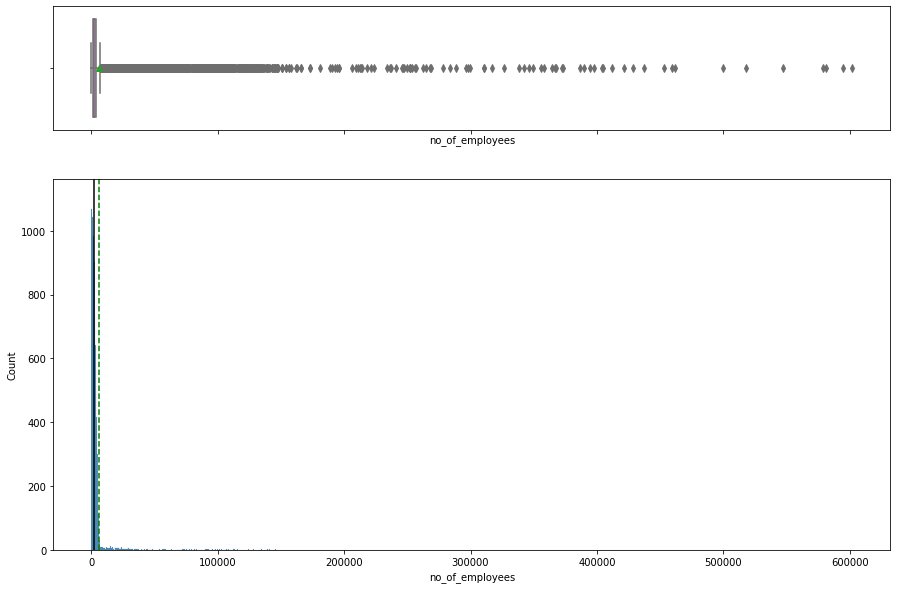

In [ ]:
# Create the boxplot and histogram for Number of Employees
histogram_boxplot(data, "no_of_employees")

Observations:

* From the histogram, the distribution of number of employees is right-skewed.

* Most employers have less than 1000 employees.

* There exist many outliers.

Prevailing Wage

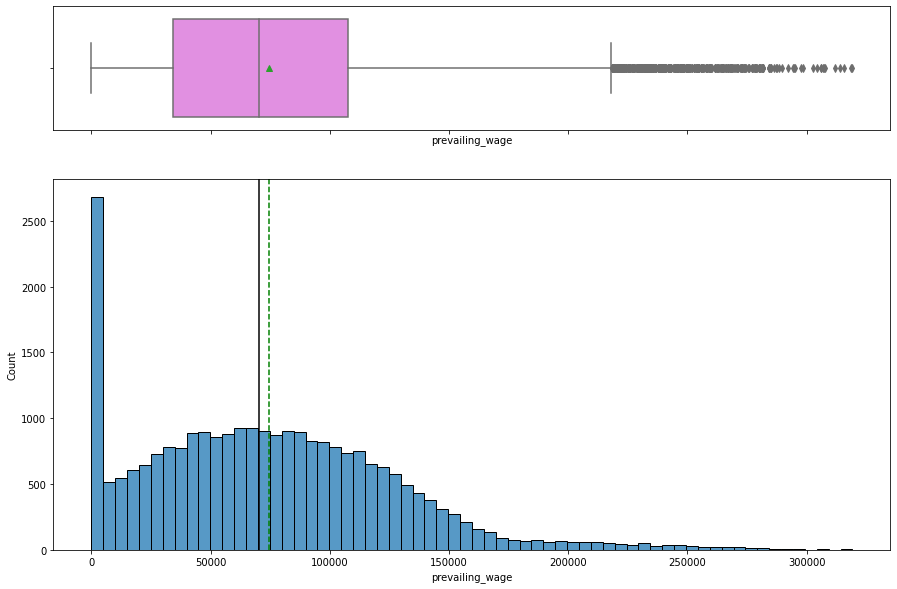

In [ ]:
# Create the boxplot and histogram for Prevailing Wage
histogram_boxplot(data,'prevailing_wage')

Observations:

* From the histogram, the distribution of prevailing wage is right-skewed.

* Some employees earn less than $3,000.

* However, most employees earn less than $150,000

* A few employees earn more than $200,000.

* Further investigation will be carried out to see how the prevailing wage varies with frequencies of payment.

**How many occupations have wage less than $100 hourly, weekly, monthly, yearly**

In [ ]:
# Check the values less than 100
data.loc[data['prevailing_wage'] < 100].shape

(176, 11)

In [ ]:
# Count the prevailing wages less than $100
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts

<bound method IndexOpsMixin.value_counts of 338      Hour
634      Hour
839      Hour
876      Hour
995      Hour
         ... 
25023    Hour
25258    Hour
25308    Hour
25329    Hour
25461    Hour
Name: unit_of_wage, Length: 176, dtype: object>

Observations:

* 176 occupations earn less than $100.

**Distribution of Continents of Employee**

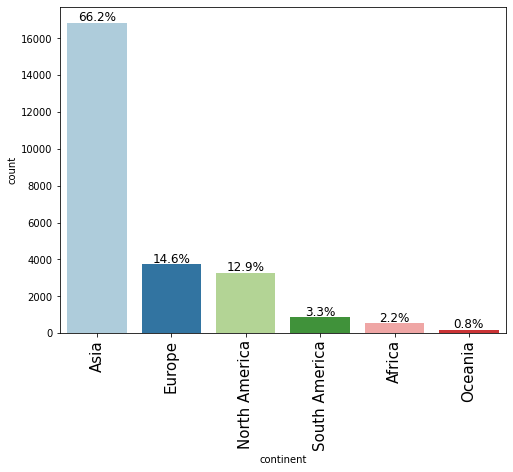

In [ ]:
# barplot of employees
labeled_barplot(data, "continent", perc=True)

Observations:

* The OFLC treats more applications of asian employees.

* Having the highest applications, 66.2% of applications are for employees of Asian descent followed by 14.6% for European employees.

* The lowest application are for employees from Oceania and Africa.

**Distribution of Education of Employee**

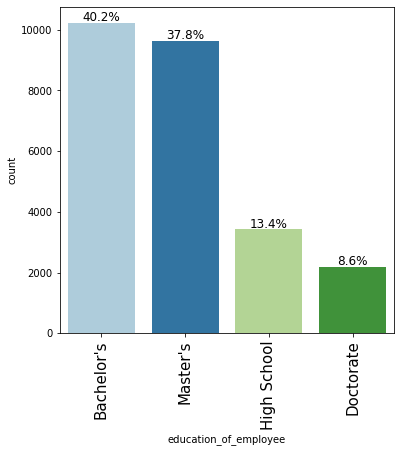

In [ ]:
# barplot of employee education
labeled_barplot(data, "education_of_employee", perc=True)

Observations:

* Most employees have a Bachelor's degree at 40.2% followed by Master's at 37.8%.

* Applicants holding Doctorate's degree are the lowest at 8.6%

**Distribution of Employees with job experience**

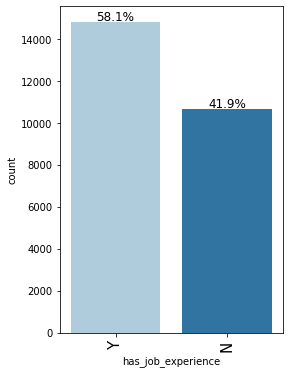

In [ ]:
# barplot of employees with job experience
labeled_barplot(data, "has_job_experience", perc=True)

Observations:

* 58.1% of employees have the requisite job experience while the remaining 41.9% do not have the requisite job experience.

**Distribution of Employees Requiring Training**

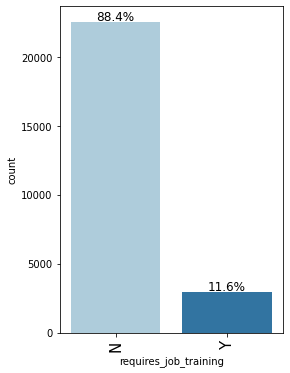

In [ ]:
# barplot of employees requiring training
labeled_barplot(data, "requires_job_training", perc=True)

Observations:

* The US attracts mostly experienced talents that do not need job training.

* 88.4% of employees do not require any job training.

**Distribution of Employment Region**

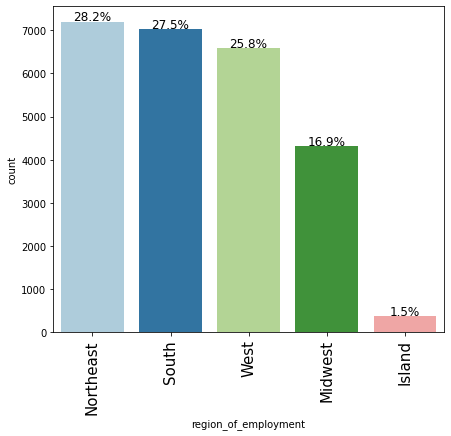

In [ ]:
# barplot of employment region
labeled_barplot(data, "region_of_employment", perc=True)

Observations:

* The Northeast at 28.2%, South at 27.5% and West at 25.8% have highest employment of foreign workers in the US.

* Island has the lowest foreign workers at 1.5%.

**Distribution of Unit of Wages**

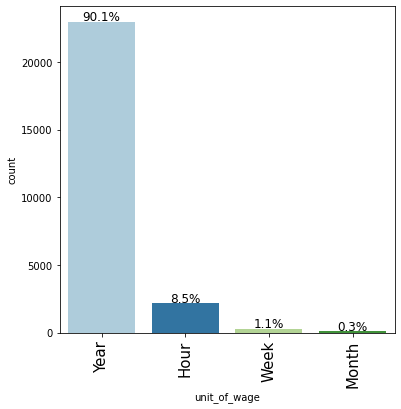

In [ ]:
# barplot of unit of wage
labeled_barplot(data, "unit_of_wage", perc=True)

Observations:

* 90.1% of businesses presented the yearly emolument while others presented hourly, weekly and monthly rates.

**Distribution of Case Status**

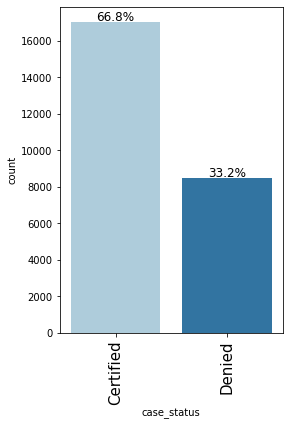

In [ ]:
# barplot of case status
labeled_barplot(data, "case_status", perc=True)

Observations:

* 66.8% of certification applications were certified while 33.2% were denied.

#### Correlation Plot for the numerical variable.

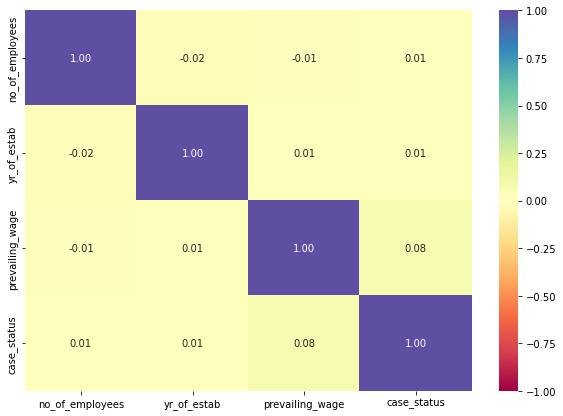

In [ ]:
# Encode the case status column
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)
# Visualise the correlation among the numerical variables in the dataset
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations:

* It appears that there is no striking correlation among the numerical columns.

* As the year of establishment increases so does the prevailing wage increase. It appears older companies pay higher than newer companies.

* It also appears that businesses with fewer employees pay more than companies with higher number of employees.

* It also appears that as the prevailing wage increases the likelihood of applications being certified increases since more applications (that is, 66.8%) were certified.

### Write a function to plot the target distribution and stacked barplot

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**How case status varies wrt employee education level**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


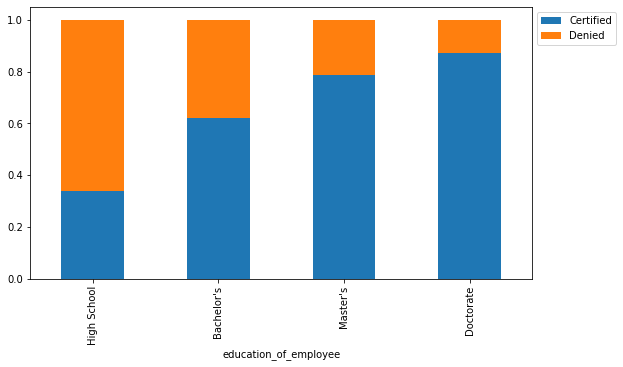

In [ ]:
# stacked barplot of employee education level and case status
stacked_barplot(data, "education_of_employee", "case_status")

Observations:

* Almost 65% of applications with high school educational qualification were denied.

* Whereas 40% and 20% of applications with Bachelor's and Master's degree qualifications respectively were denied.

* Less than 20% of applications with Doctorate degrees were denied. Most certification applications for Doctorate holders were certified.

In [ ]:
#plt.figure(figsize=(10, 5))
#sns.heatmap(pd.crosstab(data.education_of_employee,data.region_of_employment),annot=True,fmt="g",cmap="viridis")

#plt.ylabel("Education")
#plt.xlabel("Region")
#plt.show()

Correlation between employees' educational level and the region of employment

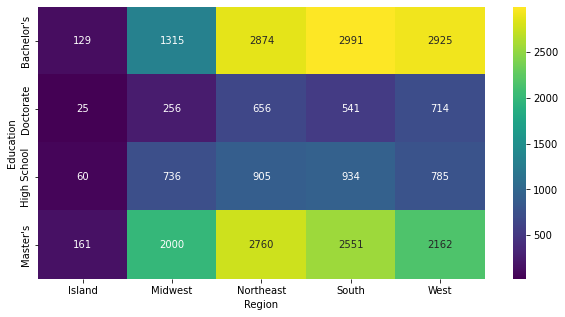

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['education_of_employee'],data['region_of_employment']),
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

Observations:

* Most of the application for employees with Doctorate degrees work in the West followed by the Northeast.

* The Northeast region has the highest number of Master's degree alien employees.

* The South has the most employees with High School certificates.

**How case status varies wrt the region of employment**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


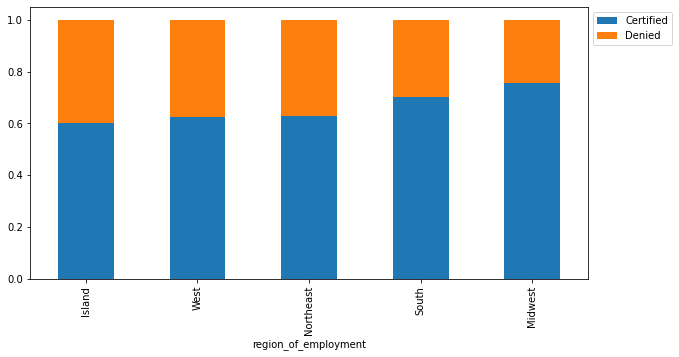

In [ ]:
# variation of region of employment and cast status
stacked_barplot(data, "region_of_employment", "case_status")

Observations:

* Applications for the Midwest region were the lowest however 70% of its application were certified.

* The Northeast has the highest number certified applications in terms of total number certified. However, just 60% of its applications were certified.

* Island and West had about 60% respectively of their applications certified.

**How case status varies wrt the employees' continent**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


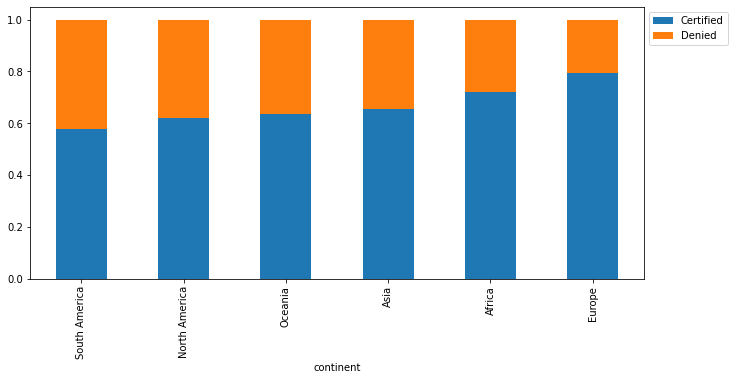

In [ ]:
# variation of case status wrt continent
stacked_barplot(data, "continent", "case_status")

Observations:

* European employees are more likely to get work visas than any other continental group.

* Almost 80% of applications of European employees were certified.

* About 65% of African employees were certified while 60% of Asian applications were certified.

* South American employees had the lowest application certifications according to its percentage.

**How case status varies wrt the employees having experience**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


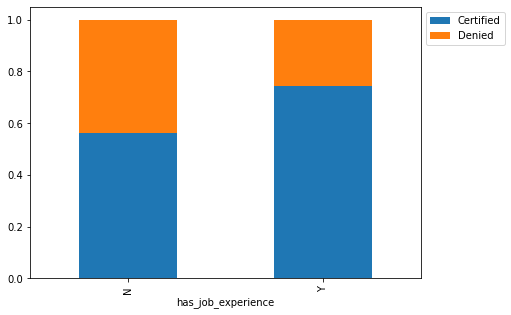

In [ ]:
# variation of case status wrt employees' job experience
stacked_barplot(data, "has_job_experience", "case_status")

Observations:

* Experienced workers are more likely to secure work visas in the US.

* 70% of all the certification applications of experienced employees were certified while less than 60% of the certification applications of inexperienced employees were certified.

**Are there experienced employees without the requisite job experience**

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


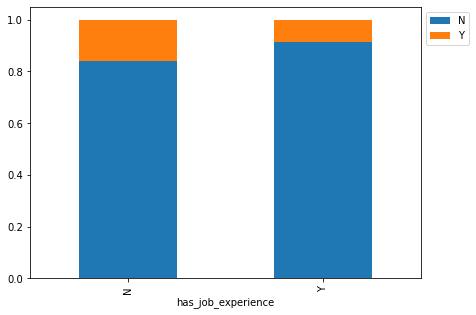

In [ ]:
# variation of job experience with job training requirement
stacked_barplot(data, "has_job_experience", "requires_job_training")

Observations:

* A few experienced employees still need training.

* There are about 10% of experienced employees who still require job training.

* However, about 17% of inexperienced employees require training.

**How does visa status relate with the prevailing wage?**

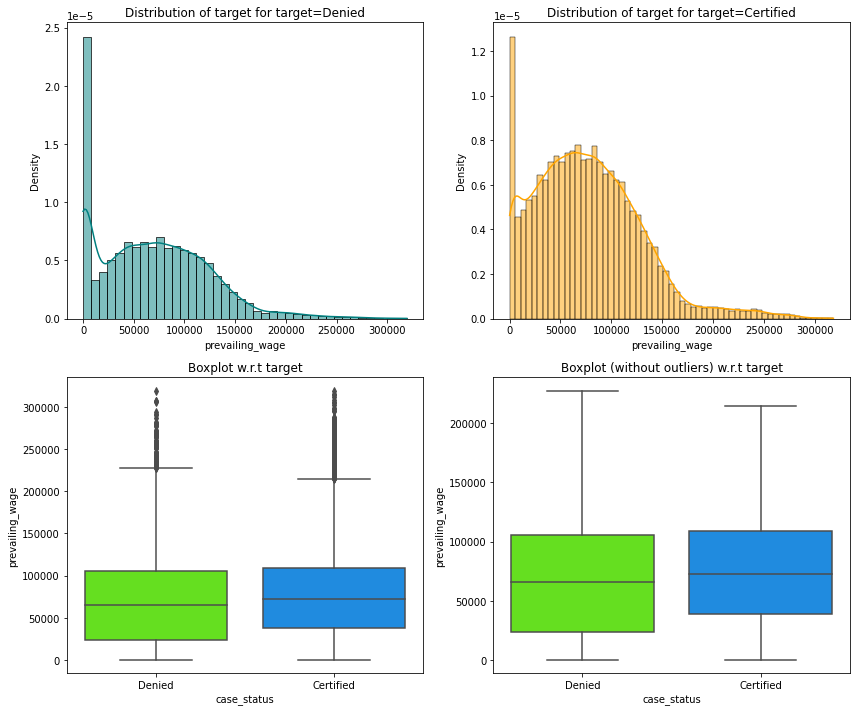

In [ ]:
# Analysis of case status and prevailing wage
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

Observations:

* Of the applications that were certified, most employees earn between USD 3,000 and USD 160,000.

* The median wage of certified applications is about USD 75,000.

**Prevailing wage variation according to different employment regions**

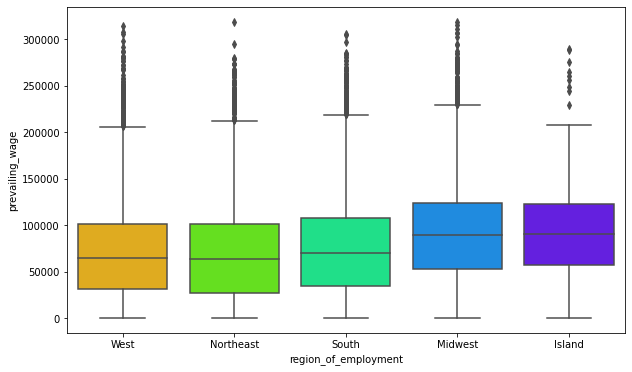

In [ ]:
# prevailing wage in different regions
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="region_of_employment", y="prevailing_wage", palette="gist_rainbow"
)
plt.show()

Observations:

* Businesses in the Midwest and Island pay higher than other regions.

* The median wage in the Midwest and Island regions are the highest in the US at almost USD 90,000.

* The West and Northeast have the lowest median wages at about USD 75,000.

**How does the case status vary with frequency of wage payments?**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


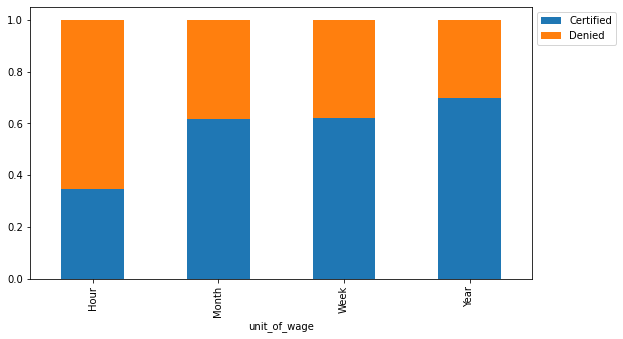

In [ ]:
# variation of case status with unit of wage
stacked_barplot(data, "unit_of_wage", "case_status")

Observations:

* Close to 65% of application with hourly unit of wage were denied. That is, less than 40% were certified.

* About 70% of applications with yearly unit of wage were certified.

* About 60% of monthly and weekly unit of wage respectively were certified.

**How does the case status vary with the type of position?**

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


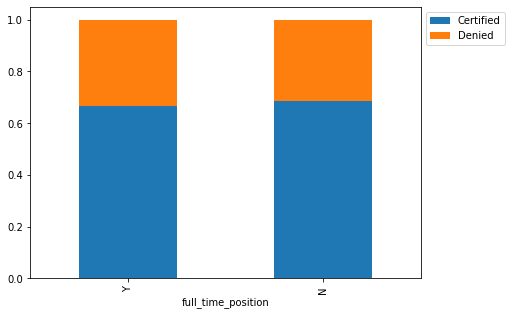

In [ ]:
# variation of case status with the position type - full time or part time
stacked_barplot(data, "full_time_position", "case_status")

Observations:

* The type of position of the employee does not influence the case status significantly.

* Applications for full-time and non-full-time positions have equally certified percentages.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Outlier Detection and Treatment**

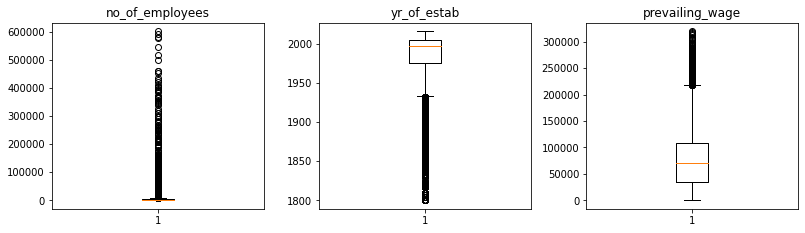

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

Observations:

* Although these values may seem like outliers however they will not be treated because number of employees in an rganisation or the year a company was established and the prevailing market wage are relative and dependent on different factors. Therefore, the values are likely reflective of the actual observations.

**Preparing the data for processing**


- To build a model that can predict application certification case statuses:
  - First, encode the case status column to binary entries.
  - Second, encode the categorical features.
  - Then, split the data into train and test sets.

In [ ]:
# Encode the case status column
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)
X = data.drop(["case_status"], axis=1)
Y = data["case_status"]


# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.3, random_state=1,stratify=Y)

**Confirm the unique observations in the case status column**

In [ ]:
# print the unique observations in the case status column
print("There are", Y.nunique(), "observations in the case status")

There are 2 observations in the case status


Observations:

* There are 2 unique entries in the case status column as expected.

**Check the shape of the train and test sets**

In [ ]:
# print the shape of the train and test sets, and the percentage distributions of classess in the train and test sets
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


**Percentage distribution of classess in the dataset**

In [ ]:
# confirming the percentage distribution of classes in the dataset
print("Percentage of classes in the dataset:")
print(Y.value_counts(1))

Percentage of classes in the dataset:
1    0.667896
0    0.332104
Name: case_status, dtype: float64


Observations:

* The dataset has been split into train and test set representing the distribution of the observations in the original dataset.

## EDA

- Since no manipulation was done to the dataset there is no need to explore the dataset again to identity any changes which can affect the initial descriptions.

**Define the functions to compute the confusion matrix and conduct performance tests on the models**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Evaluation Criteria

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

* fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [ ]:
# Fit the decision tree
dtree_model = DecisionTreeClassifier(criterion='gini',random_state=1)
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

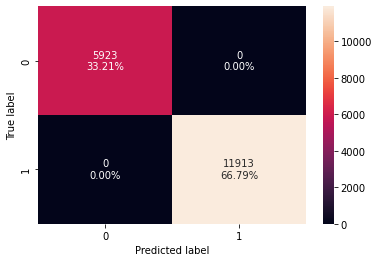

In [ ]:
# Determine the confusion matrix of the decision tree model on the training set
confusion_matrix_sklearn(dtree_model, X_train, y_train)

In [ ]:
# Check the performance of decision tree model on the training set
dtree_model_train_perf=model_performance_classification_sklearn(dtree_model, X_train, y_train)
print("Training performance:")
dtree_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

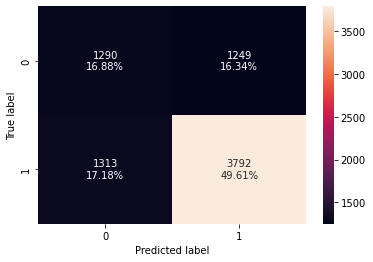

In [ ]:
# Determine the confusion matrix of the decision tree model on the test set
confusion_matrix_sklearn(dtree_model, X_test, y_test)

In [ ]:
# Check the performance of decision tree model on the test set
dtree_model_test_perf=model_performance_classification_sklearn(dtree_model, X_test, y_test)
print("Test performance:")
dtree_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


**Observations**

- The f1_scores of the model for the train and test sets are 1 and 0.74.

- The gaps between the f1-scores of the train and test performances suggests the overfitting on the train set.

* Further checks will be conducted to see if there is any improvement of the decision tree model after hyperparameter tuning.

### Hyperparameter Tuning - Decision Tree

In [ ]:
# Tune the decision tree model.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

#### Checking performance of the tuned decision tree model on the train set

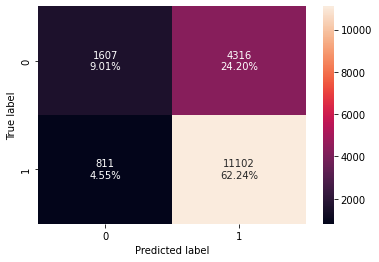

In [ ]:
# Determine the confusion matrix of the tuned decision tree model on the training set
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [ ]:
# Check the performance of tuned decision tree model on the training set
dtree_estimator_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
print("Training performance:")
dtree_estimator_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


#### Checking performance of the tuned decision tree model on the test set

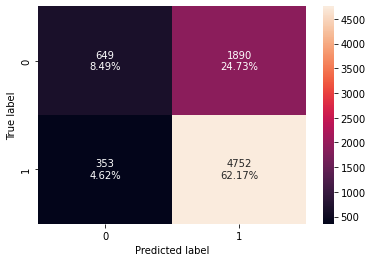

In [ ]:
# Determine the confusion matrix of the tuned decision tree model on the test set
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [ ]:
# Check the performance of tuned decision tree model on the training set
dtree_estimator_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Test performance:")
dtree_estimator_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


**Observations**

- The f1_scores of the tuned decision tree model for the train and test sets are 0.812 and 0.809 respectively.

- The tuned decision tree model does not overfit on the train set.

* The tuned decision tree model performs better on the test set.

## Building bagging and boosting models

### Bagging Classifier

In [ ]:
# fit a bagging model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Checking model performance of the bagging model on the train set

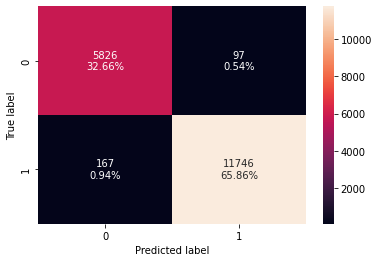

In [ ]:
# Determine the confusion matrix of the bagging model on the training set
confusion_matrix_sklearn(bagging, X_train, y_train)

In [ ]:
# Check the performance of bagging model on the training set
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance:")
bagging_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


#### Checking model performance of the bagging model on the test set

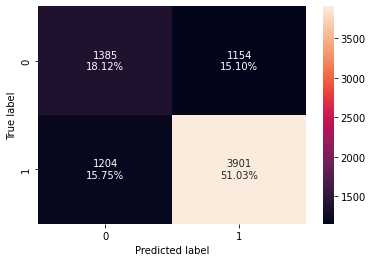

In [ ]:
# Determine the confusion matrix of the bagging model on the test set
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
# Check the performance of bagging model on the test set
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance:")
bagging_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


**Observations**

- The f1_scores of the bagging model for the train and test sets are 0.989 and 0.768 respectively.

- The bagging model overfits on the train set.

* Further checks will be conducted to see if there is any improvement of the bagging model after hyperparameter tuning.

#### Tune the bagging model

In [ ]:
# Tune the bagging decision tree model
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 100, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=90,
                  random_state=1)

#### Checking performance of the tuned bagging model on the train set

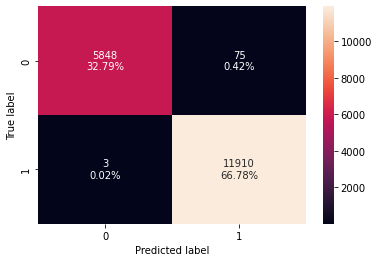

In [ ]:
# Determine the confusion matrix of the tuned bagging model on the train set
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [ ]:
# Check the performance of the tuned bagging model on the train set
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
print("Training performance:")
bagging_estimator_tuned_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.995627,0.999748,0.993742,0.996736


#### Checking performance of the tuned bagging model on the test set

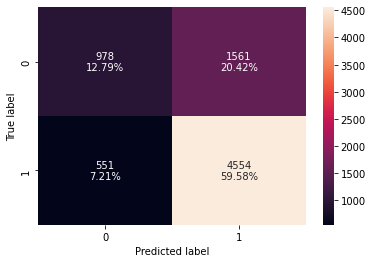

In [ ]:
# Determine the confusion matrix of the tuned bagging model on the test set
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [ ]:
# Check the performance of the tuned bagging model on the test set
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
print("Test performance:")
bagging_estimator_tuned_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.723705,0.892067,0.744726,0.811765


**Observations**

- The f1_scores of the tuned bagging model for the train and test sets are 0.997 and 0.812 respectively.

- The tuned bagging model overfits on the train set.

* The tuned bagging model performs better on the test set than the untuned bagging model.

### Random Forest Classifier

In [ ]:
# fit a random forest model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Checking performance of the random forest model on the train set

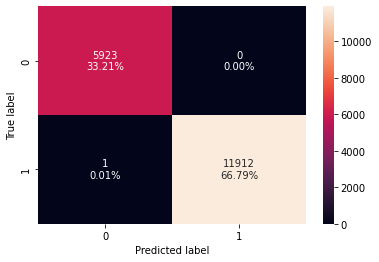

In [ ]:
# Determine the confusion matrix of the random forest model on the train set
confusion_matrix_sklearn(rf_estimator,X_train,y_train)

In [ ]:
# Check the performance of the random forest model on the train set
rf_estimator_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
print("Training performance:")
rf_estimator_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


#### Checking performance of the random forest model on the test set

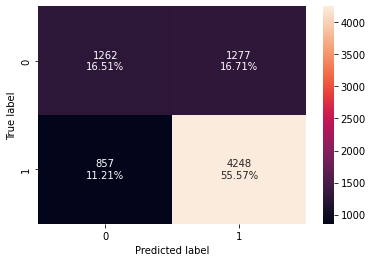

In [ ]:
# Determine the confusion matrix of the random forest model on the test set
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

In [ ]:
# Check the performance of the random forest model on the test set
rf_estimator_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Test performance:")
rf_estimator_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.720827,0.832125,0.768869,0.799247


**Observations**

- The f1_scores of the random forest model for the train and test sets are 0.999 and 0.799 respectively.

- The random forest model overfits on the train set.

* Further checks will be conducted to see if there is any improvement of the random forest model after hyperparameter tuning.

#### Tune the Random Forest Model

In [ ]:
# Tune the random forest model
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 10, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring = acc_scorer, cv = 5, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=5,
                       n_estimators=20, oob_score=True, random_state=1)

#### Checking performance of the tuned random forest model on the train set

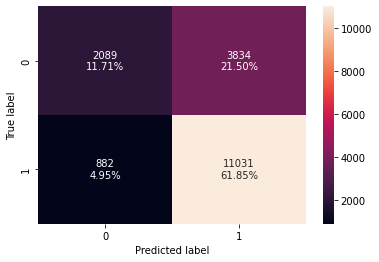

In [ ]:
# Determine the confusion matrix of the tuned random forest model on the train set
confusion_matrix_sklearn(rf_tuned,X_train,y_train)

In [ ]:
# Check the performance of the tuned random forest model on the train set
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
print("Training performance:")
rf_tuned_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.735591,0.925963,0.742079,0.823885


#### Checking performance of the random forest model on the test set

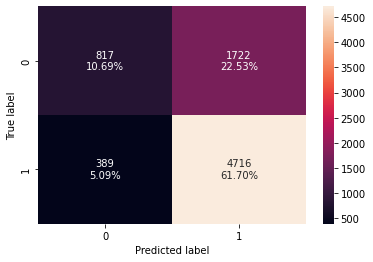

In [ ]:
# Determine the confusion matrix of the tuned random forest model on the test set
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

In [ ]:
# Check the performance of the tuned random forest model on the test set
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
print("Test performance:")
rf_tuned_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.723836,0.9238,0.732526,0.817119


**Observations**

- The f1_scores of the tuned random forest model for the train and test sets are 0.824 and 0.817 respectively.

- The tuned random forest model does not overfit on the train set.

* The tuned random forest model performs better on the test set than the untuned random forest model.

### AdaBoost Classifier

In [ ]:
#Fitting the Adaboost model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking performance of the adaboost model on the train set

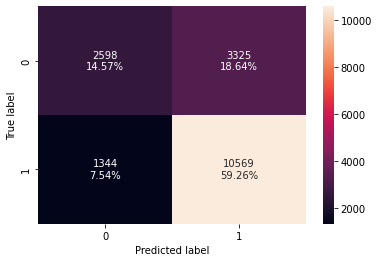

In [ ]:
# Determine the confusion matrix of the adaboost model on the train set
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [ ]:
# Check the performance of the adaboost model on the train set
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
print("Training performance:")
ab_classifier_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


#### Checking performance of the adaboost model on the test set

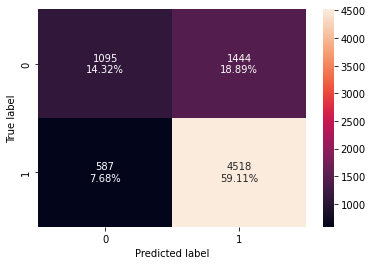

In [ ]:
# Determine the confusion matrix of the adaboost model on the test set
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [ ]:
# Check the performance of the adaboost model on the test set
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test)
print("Test performance:")
ab_classifier_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


**Observations**

- The f1_scores of the Adaboost model for the train and test sets are 0.819 and 0.816 respectively.

- The Adaboost model does not overfit on the train set.

* Further checks will be conducted to see if there is any improvement of the Adaboost model after hyperparameter tuning.

#### Tune the Adaboost Model

In [ ]:
# Tune the Adaboost Model
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking performance of the tuned adaboost model on the train set

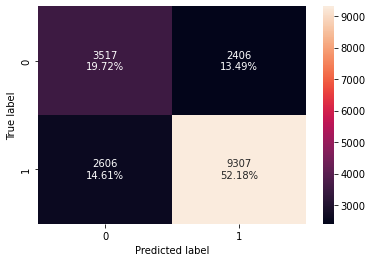

In [ ]:
# Determine the confusion matrix of the tuned adaboost model on the train set
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [ ]:
# Check the performance of the tuned adaboost model on the train set
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance:")
abc_tuned_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


#### Checking performance of the tuned adaboost model on the test set

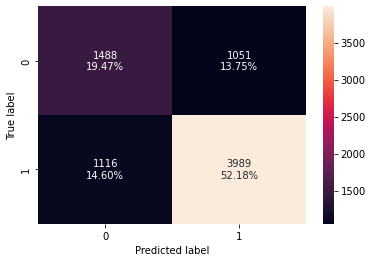

In [ ]:
# Determine the confusion matrix of the tuned adaboost model on the test set
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [ ]:
# Check the performance of the tuned adaboost model on the test set
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Test performance:")
abc_tuned_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


**Observations**

- The f1_scores of the tuned Adaboost model for the train and test sets are 0.788 and 0.786 respectively.

- The tuned Adaboost model does not overfit on the train set.

* The untuned Adaboost model performs better on the test set than the tuned Adaboost model.

### Gradient Boosting Classifier

In [ ]:
# Fit the gradient boost model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking performance of the gradient boost model on the train set

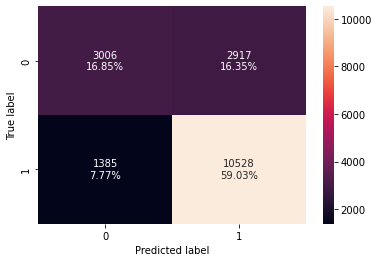

In [ ]:
# Determine the confusion matrix of the gradient boost model on the train set
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

In [ ]:
# Check the performance of the gradient boost model on the train set
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
print("Training performance:")
gb_classifier_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


#### Checking performance of the gradient boost model on the test set

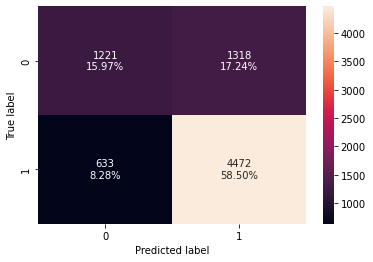

In [ ]:
# Determine the confusion matrix of the gradient boost model on the test set
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [ ]:
# Check the performance of the gradient boost model on the test set
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test)
print("Test performance:")
gb_classifier_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


**Observations**

- The f1_scores of the Adaboost model for the train and test sets are 0.830 and 0.820 respectively.

- The Gradient Boosting Classifier does not overfit on the train set.

* Further checks will be conducted to see if there is any improvement of the Gradient Boosting Classifier after hyperparameter tuning.

#### Tune the Gradient Boost Model

In [ ]:
# Tune the Gradient Boost Model
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

#### Checking performance of the tuned gradient boost model on the train set

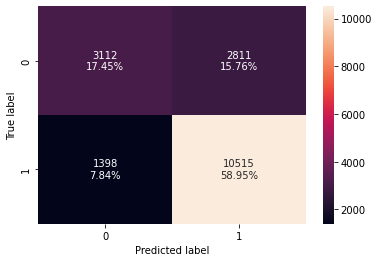

In [ ]:
# Determine the confusion matrix of the tuned gradient boost model on the train set
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [ ]:
# Check the performance of the tuned gradient boost model on the train set
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:")
gbc_tuned_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


#### Checking performance of the tuned gradient boost model on the test set

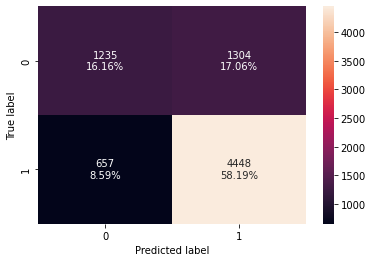

In [ ]:
# Determine the confusion matrix of the tuned gradient boost model on the test set
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [ ]:
# Check the performance of the tuned gradient boost model on the test set
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:")
gbc_tuned_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


**Observations**

- The f1_scores of the tuned Adaboost model for the train and test sets are 0.833 and 0.819 respectively.

- The tuned Gradient Boosting Classifier does not overfit on the train set. Therefore, it will generalise well on the test set.

* The untuned Gradient Boosting Classifier and tuned Gradient Boosting Classifier perform equally on the train set.

### XGBoost Classifier

In [ ]:
#Fitting the XGBoost Model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

#### Checking performance of the XGBoost model on the train set

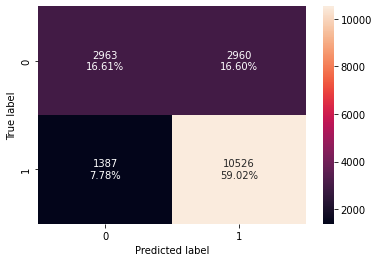

In [ ]:
# Determine the confusion matrix of the XGBoost model on the train set
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

In [ ]:
# Check the performance of the XGBoost model on the train set
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:")
xgb_classifier_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.756279,0.883573,0.780513,0.828852


#### Checking performance of the XGBoost model on the test set

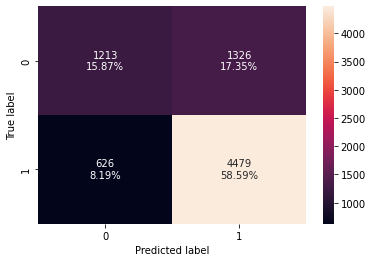

In [ ]:
# Determine the confusion matrix of the XGBoost model on the test set
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [ ]:
# Check the performance of the XGBoost model on the test set
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Test performance:")
xgb_classifier_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.744636,0.877375,0.771576,0.821082


**Observations**

- The f1_scores of the XGBoost classifier for the train and test sets are 0.829 and 0.821 respectively.

- The XGBoost model performs slightly better on the train set than on the test set. The model generalises well on the test set.

* Further checks will be conducted to see if there is any improvement of the XGBoost Classifier after hyperparameter tuning.

#### Tune the XGBoost Model

In [ ]:
# Tune the XGBoost model
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.9,
              eval_metric='logloss', gamma=5, n_estimators=200, random_state=1)

#### Checking performance of the tuned XGBoost model on the train set

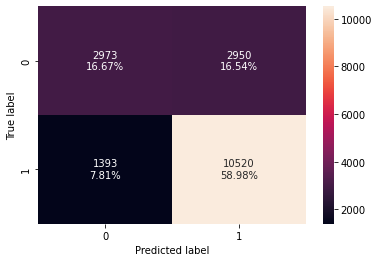

In [ ]:
# Determine the confusion matrix of the tuned XGBoost model on the train set
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

In [ ]:
# Check the performance of the XGBoost model on the train set
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:")
xgb_tuned_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.756504,0.883069,0.780995,0.828901


#### Checking performance of the tuned XGBoost model on the test set

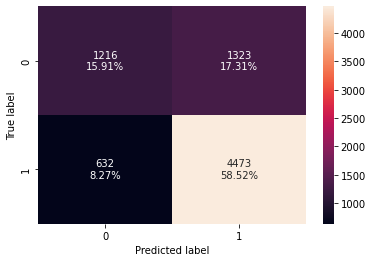

In [ ]:
# Determine the confusion matrix of the tuned XGBoost model on the test set
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [ ]:
# Check the performance of the XGBoost model on the train set
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Test performance:")
xgb_tuned_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.744244,0.8762,0.771739,0.820659


**Observations**

- The f1_scores of the tuned XGBoost classifier for the train and test sets are 0.829 and 0.821 respectively.

- The tuned XGBoost classifier does not overfit on the train set. Therefore, it will generalise well on the test set.

* The untuned XGBoost classifier and tuned XGBoost classifier perform equally on the train set.

### Stacking Classifier

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=5,
                                                       max_features='sqrt',
                                                       min_samples_split=5,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                   

#### Checking performance of the stacking model on the train set

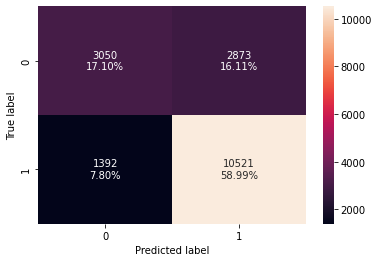

In [ ]:
# Determine the confusion matrix of the stacking model on the train set
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [ ]:
# Check the performance of the stacking model on the train set
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:")
stacking_classifier_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.760877,0.883153,0.785501,0.83147


#### Checking performance of the stacking model on the test set

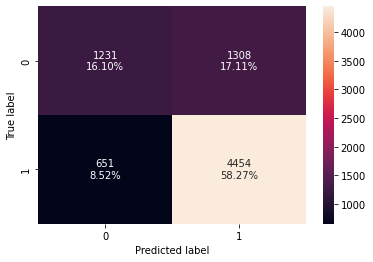

In [ ]:
# Determine the confusion matrix of the stacking model on the test set
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [ ]:
# Check the performance of the stacking model on the test set
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Test performance:")
stacking_classifier_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.743721,0.872478,0.772995,0.819729


**Observations**

- The f1_scores of the stacking classifier for the train and test sets are 0.831 and 0.820 respectively.

- The stacking classifier performs slightly better on the train set than on the test set but model generalises well on the test set since there is only slight difference in the performance.

- The comparison of all the models are done in the following cells.


## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_estimator_train_perf.T,
        bagging_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.995627,0.999944,0.735591,0.738226,0.718995,0.758802,0.764017,0.756279,0.756504,0.760877
Recall,1.0,0.931923,0.985982,0.999748,0.999916,0.925963,0.887182,0.781247,0.883740,0.882649,0.883573,0.883069,0.883153
Precision,1.0,0.720067,0.991810,0.993742,1.000000,0.742079,0.760688,0.794587,0.783042,0.789059,0.780513,0.780995,0.785501
F1,1.0,0.812411,0.988887,0.996736,0.999958,0.823885,0.819080,0.787861,0.830349,0.833234,0.828852,0.828901,0.831470


**Observations**

- The decision tree model has the highest f1_score performance on the train set followed by the random forest model at 1 and 0.999.

- The stacking classifier which combines the adaboost, random forest and gradient boosting classifiers performs slightly better, with respect to f1_score, on the train set than each of the adaboost, random forest and gradient boosting classifier individually.

- With respect to the Recall, the Adaboost performs lowest of all the models on the train set.

- The random forest classifier performs best, considering the accuracy of all the models.

- The random forest classifier performs generally better on the train set for all the performance metrics - accuracy, recall, precision and f1.

- The tuned adaboost classifier performs generally poorest on the train set for all the performance metrics.

In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        dtree_estimator_test_perf.T,
        bagging_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.723705,0.720827,0.723836,0.734301,0.716510,0.744767,0.743459,0.744636,0.744244,0.743721
Recall,0.742801,0.930852,0.764153,0.892067,0.832125,0.923800,0.885015,0.781391,0.876004,0.871303,0.877375,0.876200,0.872478
Precision,0.752232,0.715447,0.771711,0.744726,0.768869,0.732526,0.757799,0.791468,0.772366,0.773296,0.771576,0.771739,0.772995
F1,0.747487,0.809058,0.767913,0.811765,0.799247,0.817119,0.816481,0.786397,0.820927,0.819379,0.821082,0.820659,0.819729


**Observations**

- The decision tree model is the least accurate model on the test set even though it performs excellently on the train set suggesting overfitting.

- The tuned decision tree classifier performed best on recall followed by the tuned random forest model.

- With respect to the Recall, the decision tree model performs lowest of all the models on the train set.

- The Gradient Boost model has the best performance in terms of f1_score.

- The tuned adaboost classifier is the most precise model.

- Since the gradient boost model performs best on F1_score and is a fine blend of the precision and recall, then the gradient boost model may be adopted for case status classifications.

## Actionable Insights and Recommendations

- The Adaboost classifier shows the least difference between fi_scores performances on the train and test set.

- The Adaboost classifier is the least overfit model. This model will make the best generalisation and should be adopted for visa case status classification.

- The prevailing wage and unit of wage affect the visa status outcomes more than the other variables.

- To save time in treating applications, the OFLC should prioritise certifications with prevailing wage greater than USD 75,000 before others since they fit the profile of certified applications.

- To reduce the review time of applications, the OFLC should prioritise certifications for employees with job experience that don't require training since they fit the profile of certified applications.

- The higher the educational qualification, the higher the likelihood of an application being certified and vice versa. Therefore, OFLC should develop a prioritisation scale for applications with respect to educational qualifications. This can make reviews more efficient.

* The OFLC should also investigate further the sort of jobs that use the yearly unit of wage. Could this be high-skilled jobs?

- Conduct further investigations to gain insights on different industries where the employees go on to work.

- The typical profile of an application that gets certified is one with a European employee, has highest educational qualification, has job experience and does not require further training, unit of wage is presented as yearly and has a prevailing wage of at least USD 75,000. The OFLC can (as a general rule) prioritise such profile for efficiency.
